In [1]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


#Importing the dataset

In this section we will load the extracted features from RING for each pdb_id and load it into a dataframe, together with the corresponding class label for each protein.

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, ComplementNB, BernoulliNB

# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

In [3]:
path = 'drive/MyDrive/StructuralBioinformaticsUNIPD/Final Project'

In [ ]:
# Combine all PDBs into a single dataframe
dfs = []
for filename in os.listdir(path + '/features_ring'):
    dfs.append(pd.read_csv(path + '/features_ring/' + filename, sep='\t'))
df = pd.concat(dfs)
df

,pdb_id,s_ch,s_resi,s_ins,s_resn,s_ss8,s_rsa,s_up,s_down,s_phi,...,t_down,t_phi,t_psi,t_ss3,t_a1,t_a2,t_a3,t_a4,t_a5,Interaction
0,4efi,A,94,,L,E,0.000,25.0,23.0,-2.254,...,27.0,-1.722,1.825,H,-0.591,-1.302,-0.733,1.570,-0.146,NaN
1,4efi,A,264,,K,G,0.366,8.0,18.0,-0.832,...,8.0,-1.365,2.495,H,0.260,0.830,3.097,-0.838,1.512,HBOND
2,4efi,A,319,,K,H,0.366,12.0,17.0,-0.941,...,24.0,-2.690,2.752,H,1.050,0.302,-3.656,-0.259,-3.242,NaN
3,4efi,A,26,,V,E,0.021,20.0,26.0,-2.008,...,19.0,-2.142,2.888,H,1.357,-1.453,1.477,0.113,-0.837,NaN
4,4efi,A,326,,T,-,0.521,6.0,20.0,-1.209,...,20.0,-1.441,2.419,H,-0.591,-1.302,-0.733,1.570,-0.146,VDW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,4eid,A,30,,T,-,0.141,13.0,14.0,-1.418,...,12.0,-1.138,-0.721,H,-0.591,-1.302,-0.733,1.570,-0.146,NaN
141,4eid,A,74,,D,H,0.890,0.0,20.0,-1.017,...,22.0,-1.086,-0.853,H,-1.239,-0.547,2.131,0.393,0.816,HBOND
142,4eid,A,32,,K,S,0.317,11.0,20.0,-1.368,...,12.0,-1.138,-0.721,H,-0.591,-1.302,-0.733,1.570,-0.146,HBOND
143,4eid,A,27,,P,T,0.706,0.0,17.0,-1.039,...,14.0,-1.418,3.102,H,-0.032,0.326,2.213,0.908,1.313,NaN


Here we remove the rows with missing value in at least one column.

In [ ]:
# Remove all rows with NaN in at least one column
# including rows with missing class (they could be false negatives)
df.dropna(inplace=True)

# Define ground truth values
y = df['Interaction'].astype('category')
y

1      HBOND
4        VDW
7        VDW
8      HBOND
10     HBOND
       ...  
138    HBOND
139      VDW
141    HBOND
142    HBOND
144    HBOND
Name: Interaction, Length: 454193, dtype: category
Categories (6, object): ['HBOND', 'IONIC', 'PICATION', 'PIPISTACK', 'SSBOND', 'VDW']

Save the dataframe.

In [ ]:
df.to_csv('drive/MyDrive/StructuralBioinformaticsUNIPD/Final Project/clean_dataset.csv', index=False)

## Load the final dataset

In [4]:
df = pd.read_csv('drive/MyDrive/StructuralBioinformaticsUNIPD/Final Project/clean_dataset.csv')
df

,pdb_id,s_ch,s_resi,s_ins,s_resn,s_ss8,s_rsa,s_up,s_down,s_phi,...,t_down,t_phi,t_psi,t_ss3,t_a1,t_a2,t_a3,t_a4,t_a5,Interaction
0,4efi,A,264,,K,G,0.366,8.0,18.0,-0.832,...,8.0,-1.365,2.495,H,0.260,0.830,3.097,-0.838,1.512,HBOND
1,4efi,A,326,,T,-,0.521,6.0,20.0,-1.209,...,20.0,-1.441,2.419,H,-0.591,-1.302,-0.733,1.570,-0.146,VDW
2,4efi,A,322,,L,H,0.000,20.0,10.0,-1.217,...,8.0,-1.858,2.398,H,-1.019,-0.987,-1.505,1.266,-0.912,VDW
3,4efi,A,22,,V,E,0.007,24.0,25.0,-2.539,...,24.0,-2.690,2.752,H,1.050,0.302,-3.656,-0.259,-3.242,HBOND
4,4efi,A,277,,L,H,0.396,14.0,16.0,-1.160,...,21.0,-1.138,-0.769,H,1.831,-0.561,0.533,-0.277,1.648,HBOND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454188,4eid,A,10,,F,H,0.066,17.0,15.0,-1.013,...,9.0,-2.374,-0.277,H,-1.343,0.465,-0.862,-1.020,-0.255,HBOND
454189,4eid,A,10,,F,H,0.066,17.0,15.0,-1.013,...,9.0,-2.374,-0.277,H,-1.343,0.465,-0.862,-1.020,-0.255,VDW
454190,4eid,A,74,,D,H,0.890,0.0,20.0,-1.017,...,22.0,-1.086,-0.853,H,-1.239,-0.547,2.131,0.393,0.816,HBOND
454191,4eid,A,32,,K,S,0.317,11.0,20.0,-1.368,...,12.0,-1.138,-0.721,H,-0.591,-1.302,-0.733,1.570,-0.146,HBOND


# Exploratory data analysis

In this section we start with a detailed Exploratory Data Analysis of our dataset, such that all missing values have been excluded. In this way we carry on for the initial analysis and models for the dataset. We will later decide if missing values would somehow be filled.

In [ ]:
df

,pdb_id,s_ch,s_resi,s_ins,s_resn,s_ss8,s_rsa,s_up,s_down,s_phi,...,t_down,t_phi,t_psi,t_ss3,t_a1,t_a2,t_a3,t_a4,t_a5,Interaction
1,4efi,A,264,,K,G,0.366,8.0,18.0,-0.832,...,8.0,-1.365,2.495,H,0.260,0.830,3.097,-0.838,1.512,HBOND
4,4efi,A,326,,T,-,0.521,6.0,20.0,-1.209,...,20.0,-1.441,2.419,H,-0.591,-1.302,-0.733,1.570,-0.146,VDW
7,4efi,A,322,,L,H,0.000,20.0,10.0,-1.217,...,8.0,-1.858,2.398,H,-1.019,-0.987,-1.505,1.266,-0.912,VDW
8,4efi,A,22,,V,E,0.007,24.0,25.0,-2.539,...,24.0,-2.690,2.752,H,1.050,0.302,-3.656,-0.259,-3.242,HBOND
10,4efi,A,277,,L,H,0.396,14.0,16.0,-1.160,...,21.0,-1.138,-0.769,H,1.831,-0.561,0.533,-0.277,1.648,HBOND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,4eid,A,10,,F,H,0.066,17.0,15.0,-1.013,...,9.0,-2.374,-0.277,H,-1.343,0.465,-0.862,-1.020,-0.255,HBOND
139,4eid,A,10,,F,H,0.066,17.0,15.0,-1.013,...,9.0,-2.374,-0.277,H,-1.343,0.465,-0.862,-1.020,-0.255,VDW
141,4eid,A,74,,D,H,0.890,0.0,20.0,-1.017,...,22.0,-1.086,-0.853,H,-1.239,-0.547,2.131,0.393,0.816,HBOND
142,4eid,A,32,,K,S,0.317,11.0,20.0,-1.368,...,12.0,-1.138,-0.721,H,-0.591,-1.302,-0.733,1.570,-0.146,HBOND


The basic statistics show that our data is contained of 32 features (without pdb_id and interaction class) in total:


*   First 4 are connected to Source residue identifier (Chain, Index, Insertion code and Name
*   Next 12 are the source residue features (DSSP, rsa, half sphere exposure up and down, phi and psi angles, SS 3 states (from angles and 5 atchley features)
* Next 4 and 12 are accordingly the same features but for the target residue.



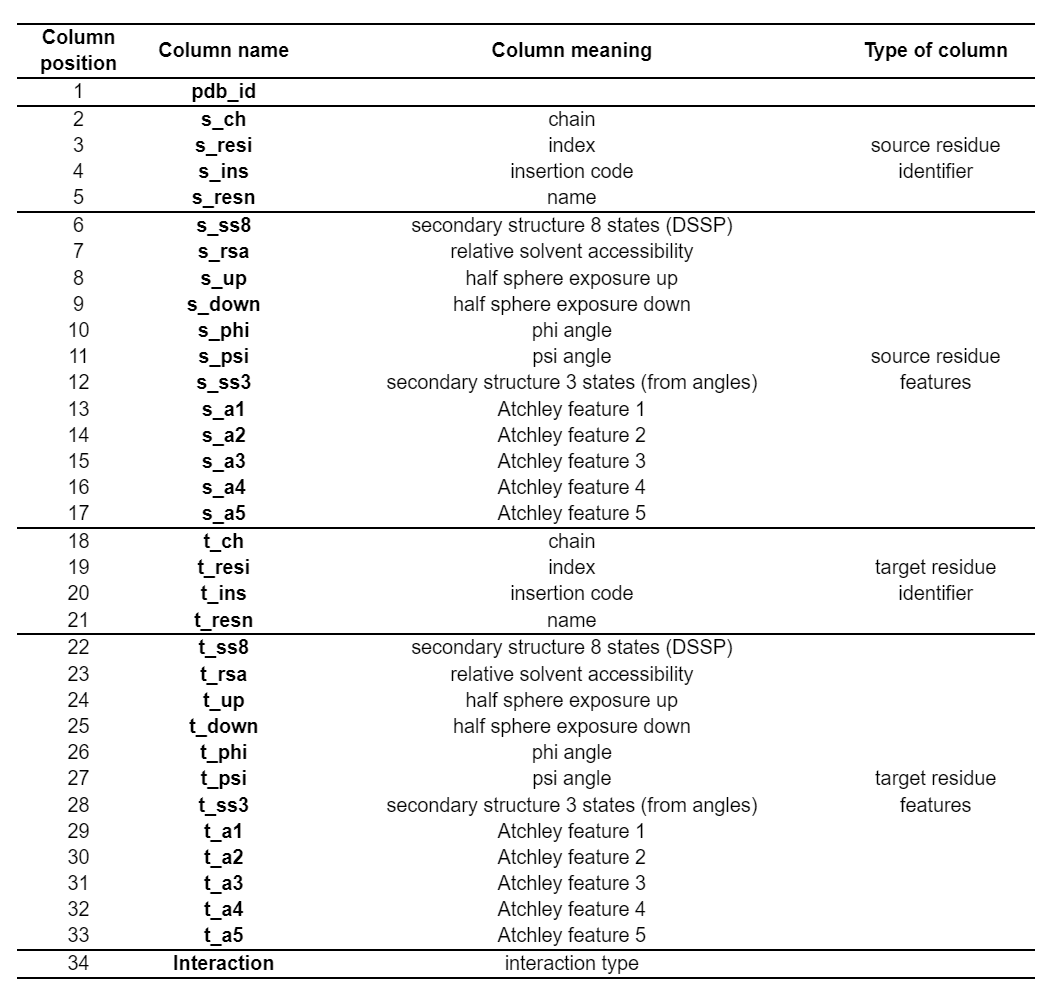

The Atchley features consist of five numerical attributes that characterize protein sequences:

* First Atchley Factor (FAA): Measures the overall hydrophobicity of
the amino acid sequence.

* Second Atchley Factor (FAC): Reflects the electron-ion interaction potential of the amino acid sequence.

* Third Atchley Factor (FAD): Describes the steric parameters of the amino acid sequence.

* Fourth Atchley Factor (FAE): Captures the electronic polarizability of the amino acid sequence.

* Fifth Atchley Factor (FAF): Represents the secondary structure factor, indicating the likelihood of specific secondary structures.

Here we display the statistics for the numerical features, (which are 10 for source 10 for target), without the residue identifier ones, first for the source and then for target residue features:

In [ ]:
df.describe().iloc[:, 1:11]

,s_rsa,s_up,s_down,s_phi,s_psi,s_a1,s_a2,s_a3,s_a4,s_a5
count,454193.000000,454193.000000,454193.000000,454193.000000,454193.000000,454193.000000,454193.000000,454193.000000,454193.000000,454193.000000
mean,0.188116,15.453908,17.050265,-1.366207,0.457975,0.008609,-0.109707,-0.039694,0.226117,-0.087530
std,0.207392,7.048051,5.461803,0.716709,1.540880,1.008144,0.939297,2.158792,0.905792,1.603459
min,0.000000,0.000000,2.000000,-3.141000,-3.141000,-1.343000,-1.524000,-4.760000,-2.128000,-3.242000
25%,0.009000,10.000000,13.000000,-1.778000,-0.744000,-1.006000,-0.987000,-1.505000,-0.397000,-1.262000
50%,0.106000,16.000000,17.000000,-1.182000,-0.521000,-0.228000,-0.279000,0.533000,0.393000,-0.146000
75%,0.324000,21.000000,21.000000,-1.070000,2.228000,0.945000,0.326000,1.502000,1.045000,1.313000
max,1.000000,45.000000,46.000000,3.141000,3.141000,1.831000,2.081000,3.097000,1.570000,2.897000


In [ ]:
df.describe().iloc[:, 12:]

,t_rsa,t_up,t_down,t_phi,t_psi,t_a1,t_a2,t_a3,t_a4,t_a5
count,454193.000000,454193.000000,454193.000000,454193.000000,454193.000000,454193.000000,454193.000000,454193.000000,454193.000000,454193.000000
mean,0.202878,15.785393,16.111994,-1.338489,0.437073,0.014565,-0.176845,0.057004,0.226516,0.030402
std,0.218879,6.662187,5.774250,0.771608,1.471111,1.031736,0.900171,2.093689,0.919315,1.576308
min,0.000000,0.000000,0.000000,-3.141000,-3.142000,-1.343000,-1.524000,-4.760000,-2.128000,-3.242000
25%,0.012000,11.000000,12.000000,-1.767000,-0.729000,-1.006000,-0.987000,-1.505000,-0.397000,-0.912000
50%,0.122000,16.000000,16.000000,-1.207000,-0.390000,-0.228000,-0.279000,0.533000,0.393000,-0.146000
75%,0.345000,21.000000,20.000000,-1.079000,2.198000,0.945000,0.326000,1.502000,1.045000,1.313000
max,1.000000,47.000000,50.000000,3.140000,3.142000,1.831000,2.081000,3.097000,1.570000,2.897000


Also we print the statistics for categorical features, and we observe DSSP features have 8 possible values whereas the feature regarding the 3 states of the angle have 3 as expected.

In [ ]:
df[["s_ss8", "s_ss3", "t_ss8", "t_ss3"]].describe()

,s_ss8,s_ss3,t_ss8,t_ss3
count,454193,454193,454193,454193
unique,8,2,8,2
top,H,H,H,H
freq,214096,439703,210785,433202


In [ ]:
print("Unique values for s_ss8: ", set(df.s_ss8.values))
print("Value counts: ", df.s_ss8.value_counts())
print()
print("Unique values for s_ss3: ", set(df.s_ss3.values))
print("Value counts: ", df.s_ss3.value_counts())
print()
print("Unique values for t_ss8: ", set(df.t_ss8.values))
print("Value counts: ", df.t_ss8.value_counts())
print()
print("Unique values for t_ss3: ", set(df.t_ss3.values))
print("Value counts: ", df.t_ss3.value_counts())



Unique values for s_ss8:  {'E', 'S', 'H', 'I', 'G', '-', 'T', 'B'}
Value counts:  H    214096
E     95628
-     72837
S     25231
T     23042
G     15500
B      5125
I      2734
Name: s_ss8, dtype: int64

Unique values for s_ss3:  {'H', 'L'}
Value counts:  H    439703
L     14490
Name: s_ss3, dtype: int64

Unique values for t_ss8:  {'E', 'S', 'H', 'I', 'G', '-', 'T', 'B'}
Value counts:  H    210785
E     92717
-     59664
T     38209
S     27446
G     16576
B      5045
I      3751
Name: t_ss8, dtype: int64

Unique values for t_ss3:  {'H', 'L'}
Value counts:  H    433202
L     20991
Name: t_ss3, dtype: int64


We see values of H are twice or three times more frequent than L values for s_ss3 and t_ss3 feature.

Regarding s_ss8 feature, values of 'H' are again most frequent both in source and target residues. Other values have pretty much the same distribution in source and target residues, with the only difference that in source residues, there are more values 'S' than 'T'.

We check for possible duplicated rows:

In [ ]:
#Find the duplicates

df.duplicated().sum()

0

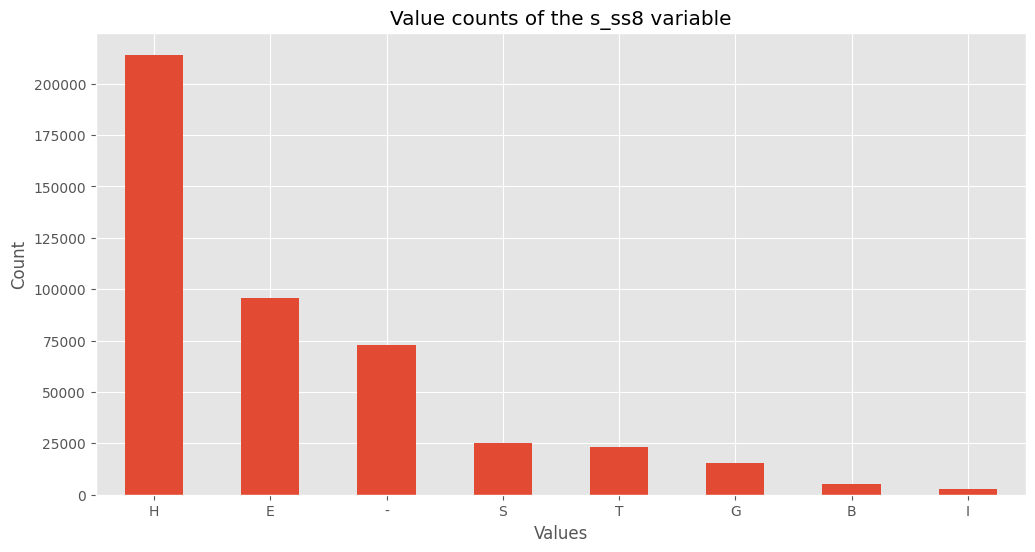

In [ ]:
df.s_ss8.value_counts().plot(kind="bar")
plt.title("Value counts of the s_ss8 variable")
plt.xlabel("Values")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

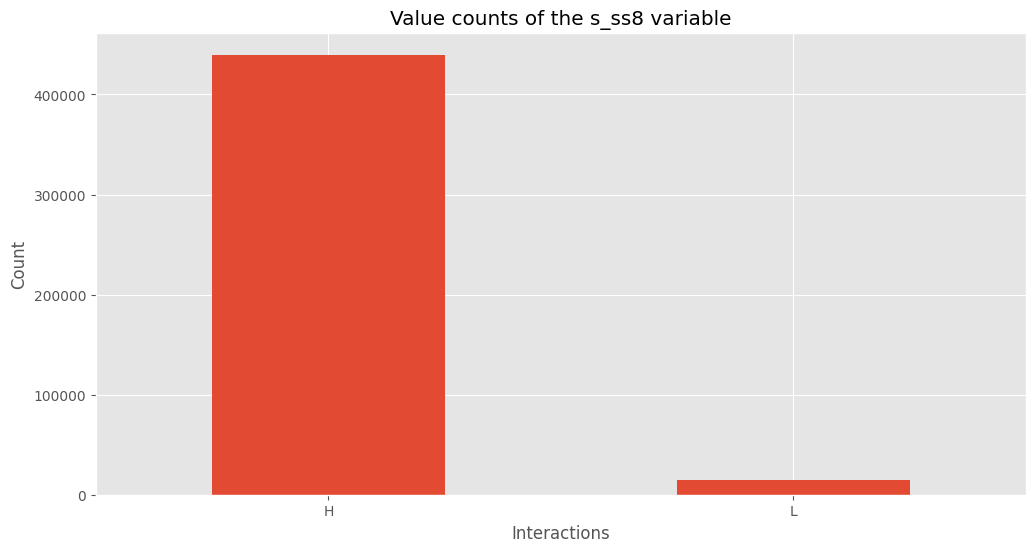

In [ ]:
df.s_ss3.value_counts().plot(kind="bar")
plt.title("Value counts of the s_ss8 variable")
plt.xlabel("Interactions")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

Let us also inspect the target class distribution. As we may see we are abundant of contacts classified as HBOND, which is of course expected since most of the bonds in a protein are covalent hydrogen bonds.

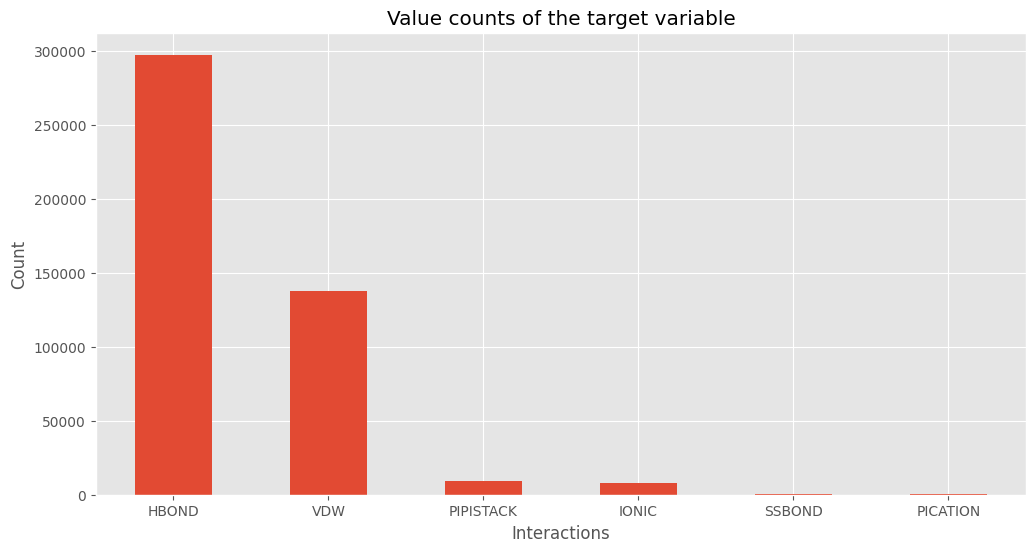

In [ ]:
df.Interaction.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Interactions")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

By plotting a pairplot for all pairs of numerical features and the target variable in the dataset, we may inspect the possible linear correlations between variables as well as take a look at the histogram distributions of each variable separately.

In [ ]:
df.columns

Index(['pdb_id', 's_ch', 's_resi', 's_ins', 's_resn', 's_ss8', 's_rsa', 's_up',
       's_down', 's_phi', 's_psi', 's_ss3', 's_a1', 's_a2', 's_a3', 's_a4',
       's_a5', 't_ch', 't_resi', 't_ins', 't_resn', 't_ss8', 't_rsa', 't_up',
       't_down', 't_phi', 't_psi', 't_ss3', 't_a1', 't_a2', 't_a3', 't_a4',
       't_a5', 'Interaction'],
      dtype='object')

From this plot we may observe some correlations between features s_a1 and s_a5, as well as between s_up and s_rsa.

It may also be observed that the psi angle feature has bimodal distribution.

Since we observe similar distribution between source and target residue features, on the next plot we will only plot the numerical features for the source residue to obtain more clear plot.

Next we plot boxplots between numeric and target variables:

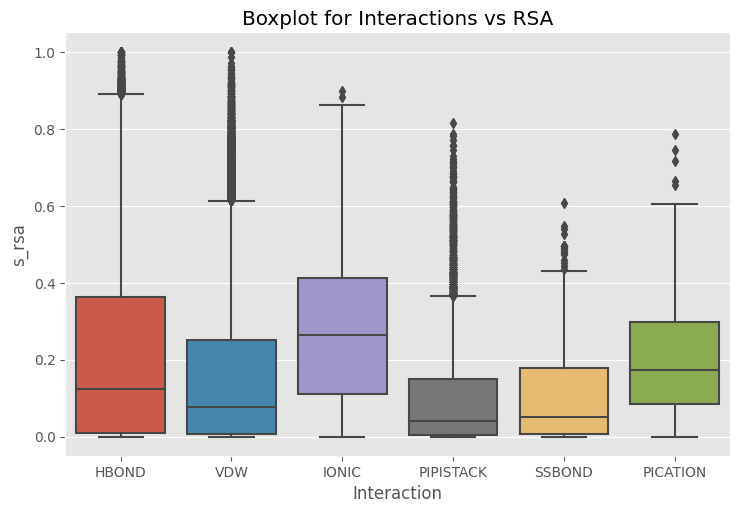

In [ ]:
sns.catplot(x="Interaction", y="s_rsa", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Interactions vs RSA")
plt.show()

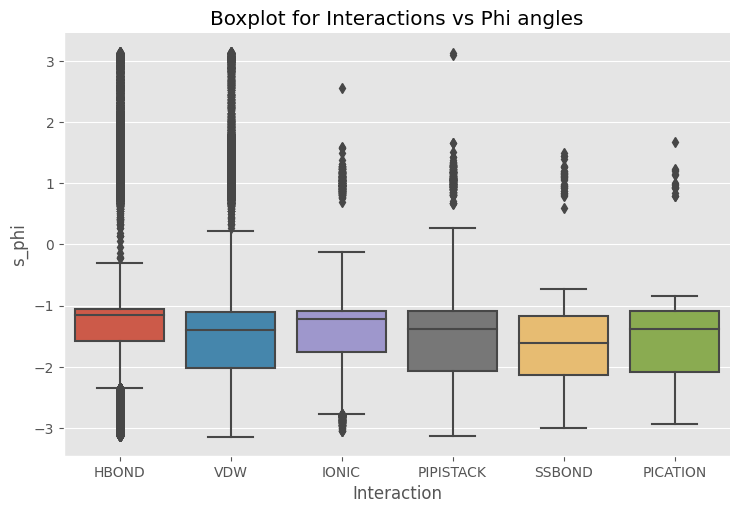

In [ ]:
sns.catplot(x="Interaction", y="s_phi", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Interactions vs Phi angles")  # C-alpha - N
plt.show()

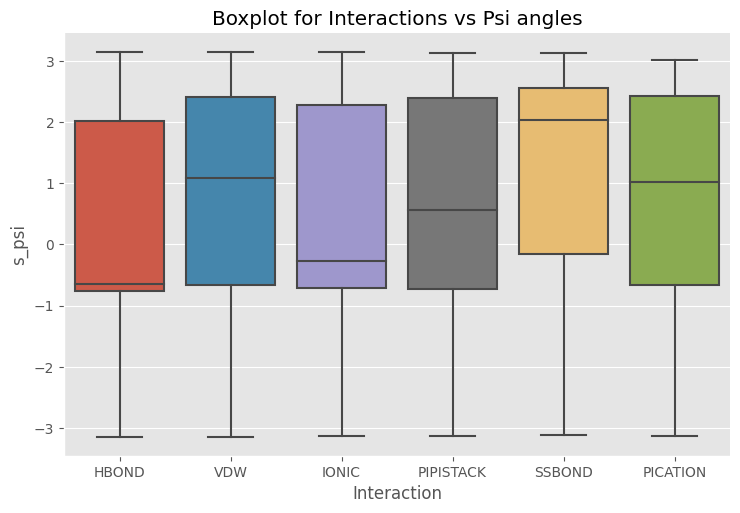

In [ ]:
sns.catplot(x="Interaction", y="s_psi", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Interactions vs Psi angles")  # C=O-N
plt.show()

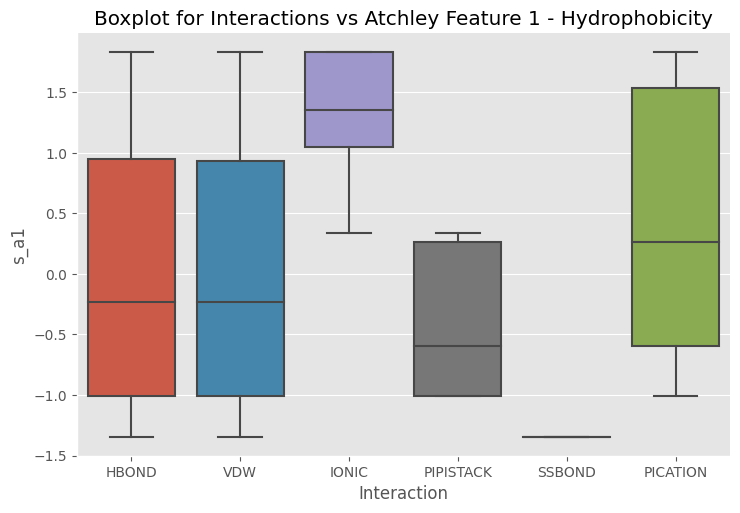

In [ ]:
sns.catplot(x="Interaction", y="s_a1", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Interactions vs Atchley Feature 1 - Hydrophobicity")
plt.show()

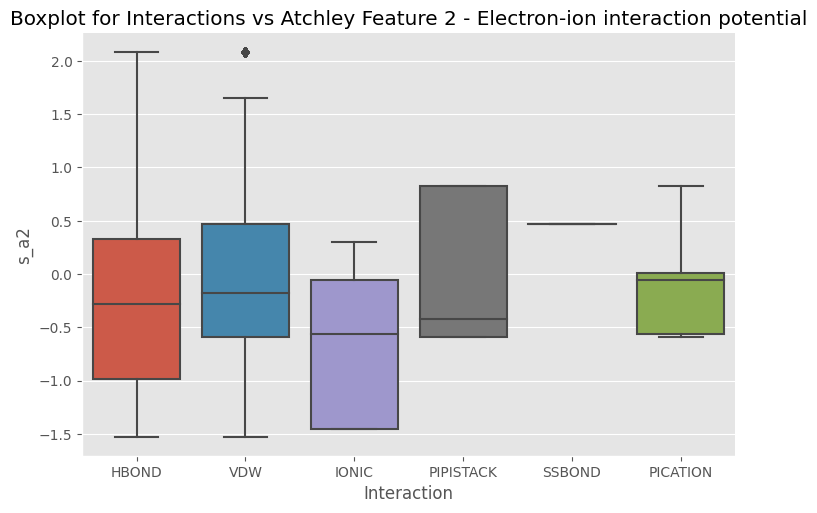

In [ ]:
sns.catplot(x="Interaction", y="s_a2", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Interactions vs Atchley Feature 2 - Electron-ion interaction potential")
plt.show()

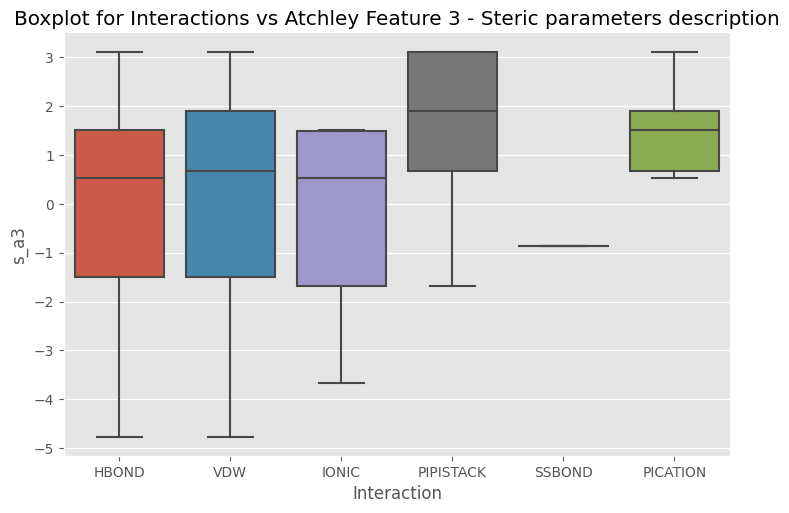

In [ ]:
sns.catplot(x="Interaction", y="s_a3", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Interactions vs Atchley Feature 3 - Steric parameters description")
plt.show()

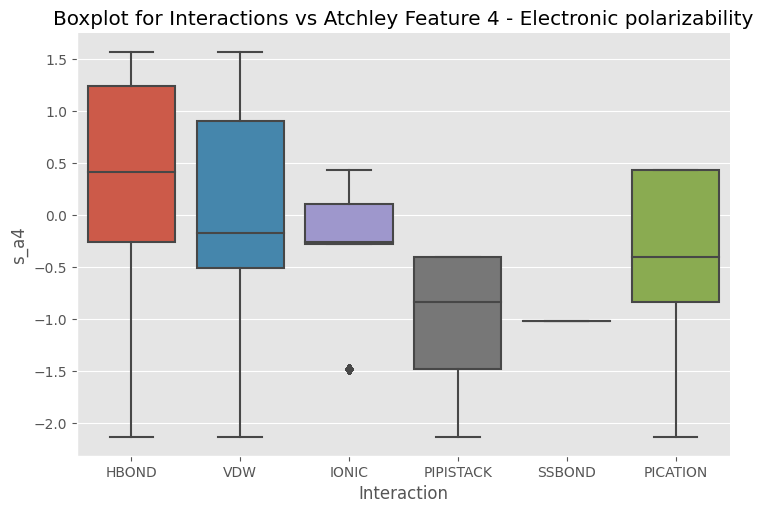

In [ ]:
sns.catplot(x="Interaction", y="s_a4", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Interactions vs Atchley Feature 4 - Electronic polarizability")
plt.show()

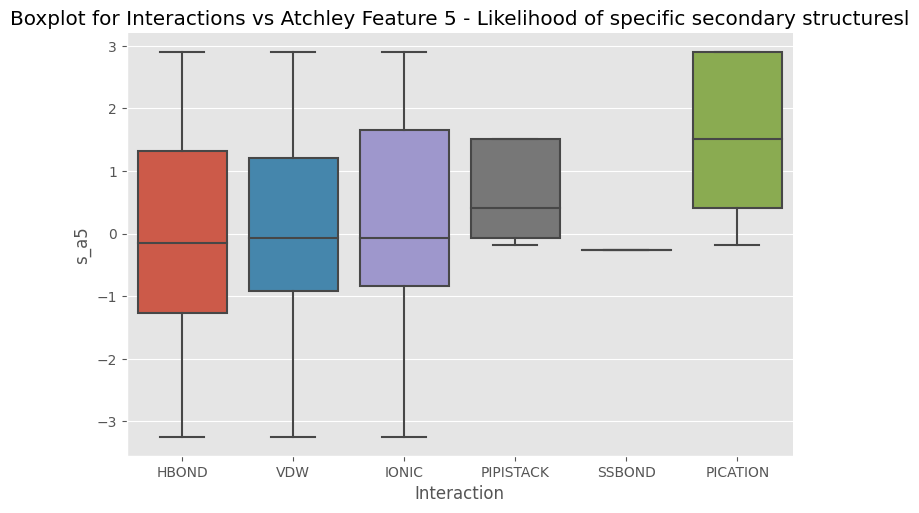

In [ ]:
sns.catplot(x="Interaction", y="s_a5", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for Interactions vs Atchley Feature 5 - Likelihood of specific secondary structuresl")
plt.show()

In [ ]:
df

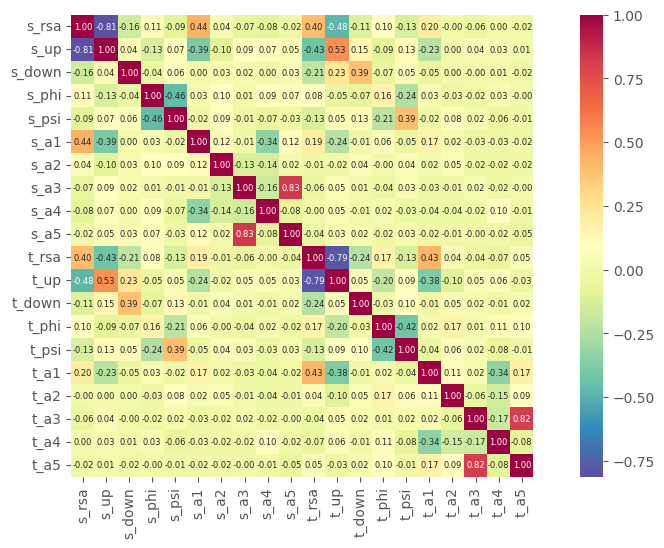

In [ ]:
columns_dropped = ['pdb_id', 's_ch', 's_resi', 's_ins', 's_resn', 't_ch', 't_resi', 't_ins', 't_resn', 's_ss3', 't_ss3', 's_ss8', 't_ss8', 'Interaction' ]

corrmat = df.drop(columns_dropped, axis=1).corr()
hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                  annot_kws={'size': 6},
                 yticklabels= [x for x in list(df.columns)  if x not in columns_dropped],
                 xticklabels=[x for x in list(df.columns)  if x not in columns_dropped],
                 cmap="Spectral_r")
plt.show()

From the correlation matrix between the numerical variables, we may observe high negative correlation between RSA feature with Half sphere exposure up (quantify the surface exposure/accessibility to solvent of a protein residue within its three-dimensional structure feature). The value of the correlation is around -0.80. The conclusion would be residues with greater solvent accessibility are more likely to have less exposure to the upper hemisphere.

Another interesting scenario is the positive correlation of around 0.83 between Atchley features 3 (steric parameters - info about spatial requirements and interactions of atoms or groups within a molecule) and 5 (secondary structure likelihood). The conclusion would be amino acids with larger steric properties tend to have a higher probability of adopting a specific secondary structure.

# Training models

In [16]:
df.head()

,pdb_id,s_ch,s_resi,s_ins,s_resn,s_ss8,s_rsa,s_up,s_down,s_phi,...,t_down,t_phi,t_psi,t_ss3,t_a1,t_a2,t_a3,t_a4,t_a5,Interaction
0,4efi,A,264,,K,G,0.366,8.0,18.0,-0.832,...,8.0,-1.365,2.495,H,0.260,0.830,3.097,-0.838,1.512,HBOND
1,4efi,A,326,,T,-,0.521,6.0,20.0,-1.209,...,20.0,-1.441,2.419,H,-0.591,-1.302,-0.733,1.570,-0.146,VDW
2,4efi,A,322,,L,H,0.000,20.0,10.0,-1.217,...,8.0,-1.858,2.398,H,-1.019,-0.987,-1.505,1.266,-0.912,VDW
3,4efi,A,22,,V,E,0.007,24.0,25.0,-2.539,...,24.0,-2.690,2.752,H,1.050,0.302,-3.656,-0.259,-3.242,HBOND
4,4efi,A,277,,L,H,0.396,14.0,16.0,-1.160,...,21.0,-1.138,-0.769,H,1.831,-0.561,0.533,-0.277,1.648,HBOND


In [17]:
df.columns

Index(['pdb_id', 's_ch', 's_resi', 's_ins', 's_resn', 's_ss8', 's_rsa', 's_up',
       's_down', 's_phi', 's_psi', 's_ss3', 's_a1', 's_a2', 's_a3', 's_a4',
       's_a5', 't_ch', 't_resi', 't_ins', 't_resn', 't_ss8', 't_rsa', 't_up',
       't_down', 't_phi', 't_psi', 't_ss3', 't_a1', 't_a2', 't_a3', 't_a4',
       't_a5', 'Interaction'],
      dtype='object')

In [5]:
df1 = df.copy()

In [6]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

label_encoder = LabelEncoder()

# Fit and transform the categorical column
encoded_values = label_encoder.fit_transform(df1['s_ss8'])

print(encoded_values)

[3 0 4 ... 4 6 7]


In [7]:
df1['s_ss8'] = encoded_values


In [8]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

label_encoder = LabelEncoder()

# Fit and transform the categorical column
encoded_values = label_encoder.fit_transform(df1['s_ss3'])

print(encoded_values)

[0 0 0 ... 0 0 1]


In [9]:
df1['s_ss3'] = encoded_values


In [10]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

label_encoder = LabelEncoder()

# Fit and transform the categorical column
encoded_values = label_encoder.fit_transform(df1['t_ss3'])

print(encoded_values)
df1['t_ss3'] = encoded_values

label_encoder = LabelEncoder()

# Fit and transform the categorical column
encoded_values = label_encoder.fit_transform(df1['t_ss8'])

print(encoded_values)
df1['t_ss8'] = encoded_values

[0 0 0 ... 0 0 0]
[0 2 2 ... 4 4 6]


In [11]:
df1.head()

,pdb_id,s_ch,s_resi,s_ins,s_resn,s_ss8,s_rsa,s_up,s_down,s_phi,...,t_down,t_phi,t_psi,t_ss3,t_a1,t_a2,t_a3,t_a4,t_a5,Interaction
0,4efi,A,264,,K,3,0.366,8.0,18.0,-0.832,...,8.0,-1.365,2.495,0,0.260,0.830,3.097,-0.838,1.512,HBOND
1,4efi,A,326,,T,0,0.521,6.0,20.0,-1.209,...,20.0,-1.441,2.419,0,-0.591,-1.302,-0.733,1.570,-0.146,VDW
2,4efi,A,322,,L,4,0.000,20.0,10.0,-1.217,...,8.0,-1.858,2.398,0,-1.019,-0.987,-1.505,1.266,-0.912,VDW
3,4efi,A,22,,V,2,0.007,24.0,25.0,-2.539,...,24.0,-2.690,2.752,0,1.050,0.302,-3.656,-0.259,-3.242,HBOND
4,4efi,A,277,,L,4,0.396,14.0,16.0,-1.160,...,21.0,-1.138,-0.769,0,1.831,-0.561,0.533,-0.277,1.648,HBOND


In [12]:
grouped_df = df1.drop(["pdb_id"], axis=1).groupby(['s_ch', 's_resi', 's_ins', 's_resn', 't_ch', 't_resi', 't_ins', 't_resn' ])

# List to store the values from all groups
all_group_values = []
X_list = []
y_list = []

label_dict = {"HBOND": 0,
              "IONIC": 1,
              "PICATION": 2,
              "PIPISTACK": 3,
              "SSBOND": 4,
              "VDW": 5 }

# Iterate over the groups and extract values
for group_name, group_df in grouped_df:
    # print(group_name)
    # print(group_df)  # contains all rows which are the same except for the class value
    values_within_group = group_df['Interaction'].tolist()
    row = group_df.iloc[:1,:-1].drop(['s_ch', 's_resi', 's_ins', 's_resn', 't_ch', 't_resi', 't_ins', 't_resn'], axis =1).values

    # print(row[0])
    # print(values_within_group)  # we want this to be our y
    X_list.append(list(row[0]))

    # one-hot encoding
    labels_list = [0,0,0,0,0,0]
    for label in values_within_group:
      labels_list[label_dict[label]]= 1

    # print(labels_list)
    y_list.append(labels_list)
    # print()

    # all_group_values.extend(values_within_group)

# print(all_group_values)

In [13]:
df1.shape

(454193, 34)

In [14]:
np.array(X_list).shape


(327736, 24)

In [15]:
np.array(y_list).shape

(327736, 6)

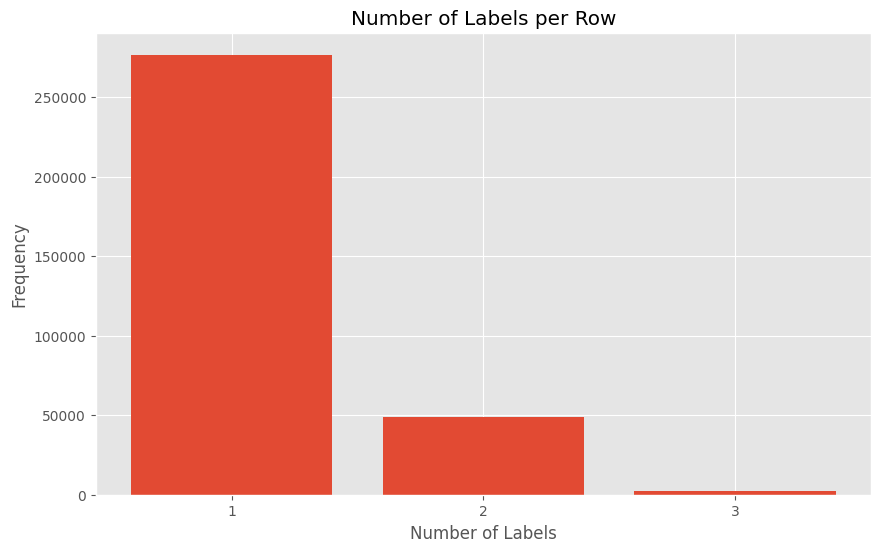

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate row sums
row_sums = np.sum(y_list, axis=1)

# Count the occurrences of each sum
label_counts = np.bincount(row_sums)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(label_counts)), label_counts[1:])
plt.title("Number of Labels per Row")
plt.xlabel("Number of Labels")
plt.ylabel("Frequency")
plt.xticks(range(1, len(label_counts)))
plt.show()


In [ ]:
# Define training features
# X = df[['s_rsa', 's_up', 's_down', 's_phi', 's_psi', 's_a1', 's_a2', 's_a3', 's_a4', 's_a5',
#         't_rsa', 't_up', 't_down', 't_phi', 't_psi', 't_a1', 't_a2', 't_a3', 't_a4', 't_a5']]

# # Calculate percentiles and transform into categories
# X = X.rank(pct=True).round(1).astype('category')
# X

# OneVsRest Classification

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X_list, y_list, test_size=0.2, random_state=42)

y_train_swapped = list(map(list, zip(*y_train)))
y_test_swapped = list(map(list, zip(*y_test)))

In [18]:
np.array(x_train).shape

(262188, 24)

In [19]:
np.array(y_train_swapped[0]).shape

(262188,)

# OneVSRest with Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    matthews_corrcoef,
    balanced_accuracy_score,
    average_precision_score,
    roc_auc_score,
)
from sklearn.multiclass import OneVsRestClassifier

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

categories = label_dict.values()

for category in categories:
    print('**Processing {}...**'.format(category))

    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, y_train_swapped[category])

    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test_swapped[category], prediction)))
    print("\n")

    # Calculating precision, recall, and F1-score
    report = classification_report(y_test_swapped[category], prediction)
    print(report)
    print("\n")

    # Calculating additional metrics
    mcc = matthews_corrcoef(y_test_swapped[category], prediction)
    balanced_accuracy = balanced_accuracy_score(y_test_swapped[category], prediction)
    avg_precision = average_precision_score(y_test_swapped[category], prediction)
    roc_auc = roc_auc_score(y_test_swapped[category], prediction)

    # Print the additional metrics
    print('Matthew\'s correlation coefficient: {}'.format(mcc))
    print('Balanced accuracy: {}'.format(balanced_accuracy))
    print('Average precision score: {}'.format(avg_precision))
    print('Area under the ROC curve: {}'.format(roc_auc))
    print("\n")


**Processing 0...**
Test accuracy is 0.7122414108744737


              precision    recall  f1-score   support

           0       0.56      0.23      0.32     19869
           1       0.73      0.92      0.82     45679

    accuracy                           0.71     65548
   macro avg       0.65      0.57      0.57     65548
weighted avg       0.68      0.71      0.67     65548



Matthew's correlation coefficient: 0.21065807969259828
Balanced accuracy: 0.5749648771885192
Average precision score: 0.7301886741316568
Area under the ROC curve: 0.5749648771885192


**Processing 1...**
Test accuracy is 0.9759260389333008


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     63945
           1       0.53      0.13      0.21      1603

    accuracy                           0.98     65548
   macro avg       0.75      0.57      0.60     65548
weighted avg       0.97      0.98      0.97     65548



Matthew's correlation coefficient: 0.25851

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Matthew's correlation coefficient: 0.0
Balanced accuracy: 0.5
Average precision score: 0.0015713675474461463
Area under the ROC curve: 0.5


**Processing 3...**
Test accuracy is 0.9740037834869103


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     63825
           1       0.51      0.27      0.35      1723

    accuracy                           0.97     65548
   macro avg       0.75      0.63      0.67     65548
weighted avg       0.97      0.97      0.97     65548



Matthew's correlation coefficient: 0.35695869023125854
Balanced accuracy: 0.6297509854349542
Average precision score: 0.1552965728290736
Area under the ROC curve: 0.6297509854349542


**Processing 4...**
Test accuracy is 0.9989778482943797


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65391
           1       0.77      0.81      0.79       157

    accuracy                           1.00     65548
   macro avg

# OneVSRest with MLP

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    matthews_corrcoef,
    balanced_accuracy_score,
    average_precision_score,
    roc_auc_score,
)
from sklearn.multiclass import OneVsRestClassifier

# Using pipeline for applying neural network and one vs rest classifier
NN_pipeline = Pipeline([
    ('clf', OneVsRestClassifier(MLPClassifier(), n_jobs=-1)),
])

categories = label_dict.values()

for category in categories:
    print('**Processing {}...**'.format(category))

    # Training neural network model on train data
    NN_pipeline.fit(x_train, y_train_swapped[category])

    # Calculating test accuracy
    prediction = NN_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test_swapped[category], prediction)))
    print("\n")

    # Calculating precision, recall, and F1-score
    report = classification_report(y_test_swapped[category], prediction)
    print(report)
    print("\n")

    # Calculating additional metrics
    mcc = matthews_corrcoef(y_test_swapped[category], prediction)
    balanced_accuracy = balanced_accuracy_score(y_test_swapped[category], prediction)
    avg_precision = average_precision_score(y_test_swapped[category], prediction)
    roc_auc = roc_auc_score(y_test_swapped[category], prediction)

    # Print the additional metrics
    print('Matthew\'s correlation coefficient: {}'.format(mcc))
    print('Balanced accuracy: {}'.format(balanced_accuracy))
    print('Average precision score: {}'.format(avg_precision))
    print('Area under the ROC curve: {}'.format(roc_auc))
    print("\n")


**Processing 0...**
Test accuracy is 0.7798254714102643


              precision    recall  f1-score   support

           0       0.67      0.55      0.60     19869
           1       0.82      0.88      0.85     45679

    accuracy                           0.78     65548
   macro avg       0.74      0.71      0.73     65548
weighted avg       0.77      0.78      0.77     65548



Matthew's correlation coefficient: 0.45590627082409213
Balanced accuracy: 0.7149112716886424
Average precision score: 0.8034574897965989
Area under the ROC curve: 0.7149112716886424


**Processing 1...**
Test accuracy is 0.9815555013120156


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     63945
           1       0.67      0.48      0.56      1603

    accuracy                           0.98     65548
   macro avg       0.83      0.74      0.78     65548
weighted avg       0.98      0.98      0.98     65548



Matthew's correlation coefficient: 0.56082

# OneVSRest with custom Neural Network

In [34]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    multilabel_confusion_matrix,
)
import keras
from sklearn.metrics import (
    matthews_corrcoef,
    balanced_accuracy_score,
    average_precision_score,
    roc_auc_score,
)

def NN_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(64, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(32, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])
    return model

categories = label_dict.values()

for category in categories:
    print('**Processing {}...**'.format(category))

    n_inputs, n_outputs = len(x_train[0]), 1

    # Define the neural network model
    model = NN_model(n_inputs, n_outputs)

    # Define the EarlyStopping callback with accuracy as the monitored metric
    early_stopping = EarlyStopping(monitor='accuracy', patience=2, restore_best_weights=True)

    # Training the neural network model with early stopping
    model.fit(x_train, y_train_swapped[category], epochs=30, batch_size=32, verbose=1, callbacks=[early_stopping])

    # Predicting the test data
    y_pred = model.predict(x_test)
    y_pred_classes = (y_pred > 0.5).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_swapped[category], y_pred_classes)
    print('Test accuracy is {}'.format(accuracy))
    print("\n")

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test_swapped[category], y_pred_classes, average='macro')
    recall = recall_score(y_test_swapped[category], y_pred_classes, average='macro')
    f1 = f1_score(y_test_swapped[category], y_pred_classes, average='macro')

    # Print the precision, recall, and F1-score
    print('Precision: {}'.format(precision))
    print('Recall: {}'.format(recall))
    print('F1-score: {}'.format(f1))
    print("\n")

    # Calculate and print the multilabel confusion matrix
    mcm = multilabel_confusion_matrix(y_test_swapped[category], y_pred_classes)
    print('Multilabel Confusion Matrix:')
    print(mcm)
    print("\n")

    # Calculate additional metrics
    mcc = matthews_corrcoef(y_test_swapped[category], y_pred_classes)
    balanced_accuracy = balanced_accuracy_score(y_test_swapped[category], y_pred_classes)
    avg_precision = average_precision_score(y_test_swapped[category], y_pred_classes)
    roc_auc = roc_auc_score(y_test_swapped[category], y_pred_classes)

    # Print the additional metrics
    print('Matthew\'s correlation coefficient: {}'.format(mcc))
    print('Balanced accuracy: {}'.format(balanced_accuracy))
    print('Average precision score: {}'.format(avg_precision))
    print('Area under the ROC curve: {}'.format(roc_auc))
    print("\n")


**Processing 0...**
Epoch 1/30
8194/8194 [==============================] - 38s 4ms/step - loss: 0.5382 - accuracy: 0.7270 - precision_5: 0.7593 - recall_5: 0.8927
Epoch 2/30
8194/8194 [==============================] - 35s 4ms/step - loss: 0.5037 - accuracy: 0.7467 - precision_5: 0.7777 - recall_5: 0.8930
Epoch 3/30
8194/8194 [==============================] - 36s 4ms/step - loss: 0.4909 - accuracy: 0.7545 - precision_5: 0.7865 - recall_5: 0.8906
Epoch 4/30
8194/8194 [==============================] - 35s 4ms/step - loss: 0.4837 - accuracy: 0.7589 - precision_5: 0.7912 - recall_5: 0.8901
Epoch 5/30
8194/8194 [==============================] - 34s 4ms/step - loss: 0.4784 - accuracy: 0.7623 - precision_5: 0.7942 - recall_5: 0.8909
Epoch 6/30
8194/8194 [==============================] - 34s 4ms/step - loss: 0.4740 - accuracy: 0.7653 - precision_5: 0.7968 - recall_5: 0.8917
Epoch 7/30
8194/8194 [==============================] - 34s 4ms/step - loss: 0.4709 - accuracy: 0.7677 - precision_5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Matthew's correlation coefficient: 0.0
Balanced accuracy: 0.5
Average precision score: 0.0015713675474461463
Area under the ROC curve: 0.5


**Processing 3...**
Epoch 1/30
8194/8194 [==============================] - 39s 5ms/step - loss: 0.0579 - accuracy: 0.9749 - precision_8: 0.5723 - recall_8: 0.3723
Epoch 2/30
8194/8194 [==============================] - 36s 4ms/step - loss: 0.0288 - accuracy: 0.9854 - precision_8: 0.7036 - recall_8: 0.8187
Epoch 3/30
8194/8194 [==============================] - 36s 4ms/step - loss: 0.0254 - accuracy: 0.9874 - precision_8: 0.7089 - recall_8: 0.9210
Epoch 4/30
8194/8194 [==============================] - 36s 4ms/step - loss: 0.0243 - accuracy: 0.9881 - precision_8: 0.7077 - recall_8: 0.9677
Epoch 5/30
8194/8194 [==============================] - 36s 4ms/step - loss: 0.0237 - accuracy: 0.9884 - precision_8: 0.7098 - recall_8: 0.9796
Epoch 6/30
8194/8194 [==============================] - 37s 4ms/step - loss: 0.0235 - accuracy: 0.9884 - precision_8: 0

# Classifier Chains

In [17]:
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 9.6 MB/s eta 0:00:00


In [19]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 21.1 MB/s eta 0:00:00


In [37]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    matthews_corrcoef,
    balanced_accuracy_score,
    average_precision_score,
    roc_auc_score
)
from sklearn.metrics import multilabel_confusion_matrix
import torch
from torchmetrics.functional.classification import multilabel_matthews_corrcoef

X, y = np.array(X_list), np.array(y_list)
x_train, x_test, y_train, y_test = train_test_split(X_list, y_list, test_size=0.2, random_state=42)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


# Initialize classifier chains multi-label classifier
classifier = ClassifierChain(MLPClassifier(verbose=True))

# Training MLPClassifier model on train data
classifier.fit(x_train, y_train)

# Predict
predictions = classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy =", accuracy)
print()

# Calculate precision, recall, and F1-score
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)
print()

# Print the additional metrics
# Calculate multilabel confusion matrix
mcm = multilabel_confusion_matrix(y_test, predictions)

target = torch.tensor(y_test)
preds = torch.tensor(predictions.toarray(), dtype=torch.long)  # Convert the sparse matrix to a dense array and cast to long
mcc = multilabel_matthews_corrcoef(target, preds, num_labels=6)

y_test_flat = y_test.flatten()
predictions_flat = preds.flatten()
balanced_accuracy = balanced_accuracy_score(y_test_flat, predictions_flat)
avg_precision = average_precision_score(y_test, preds, average='micro')
roc_auc = roc_auc_score(y_test, preds, average='micro')

# Print the additional metrics
# print('Matthew\'s correlation coefficient: {}'.format(mcc_1))
print('Matthew\'s correlation coefficient: {}'.format(mcc))
print('Balanced accuracy: {}'.format(balanced_accuracy))
print('Average precision score: {}'.format(avg_precision))
print('Area under the ROC curve: {}'.format(roc_auc))


Iteration 1, loss = 0.54185010
Iteration 2, loss = 0.50989196
Iteration 3, loss = 0.50030389
Iteration 4, loss = 0.49460454
Iteration 5, loss = 0.48919180
Iteration 6, loss = 0.48591735
Iteration 7, loss = 0.48202839
Iteration 8, loss = 0.48004676
Iteration 9, loss = 0.47696872
Iteration 10, loss = 0.47478177
Iteration 11, loss = 0.47296197
Iteration 12, loss = 0.47188657
Iteration 13, loss = 0.47038847
Iteration 14, loss = 0.46864807
Iteration 15, loss = 0.46807106
Iteration 16, loss = 0.46594078
Iteration 17, loss = 0.46551214
Iteration 18, loss = 0.46406363
Iteration 19, loss = 0.46322233
Iteration 20, loss = 0.46286308
Iteration 21, loss = 0.46169101
Iteration 22, loss = 0.46071116
Iteration 23, loss = 0.46032672
Iteration 24, loss = 0.45971286
Iteration 25, loss = 0.45923418
Iteration 26, loss = 0.45860024
Iteration 27, loss = 0.45808953
Iteration 28, loss = 0.45721322
Iteration 29, loss = 0.45654048
Iteration 30, loss = 0.45648617
Iteration 31, loss = 0.45606200
Iteration 32, los

# Classifier chain model training with oversampled dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_list, y_list, test_size=0.2, random_state=42)

In [43]:
np.array(x_train).shape

(262188, 24)

In [44]:
x_oversampled = pd.read_csv('drive/MyDrive/StructuralBioinformaticsUNIPD/Final Project/X_minority_oversampled.csv')
x_oversampled = x_oversampled.drop("Unnamed: 0", axis=1)
x_oversampled_list = x_oversampled.values.tolist()

In [45]:
x_train.extend(x_oversampled_list)

In [47]:
np.array(x_oversampled_list).shape

(30000, 24)

In [46]:
np.array(x_train).shape

(292188, 24)

In [49]:
np.array(y_train).shape

(262188, 6)

In [48]:
y_oversampled = pd.read_csv('drive/MyDrive/StructuralBioinformaticsUNIPD/Final Project/y_minority_oversampled.csv')
y_oversampled = y_oversampled.drop("Unnamed: 0", axis=1)
y_oversampled_list = y_oversampled.values.tolist()

In [50]:
np.array(y_oversampled_list).shape

(30000, 6)

In [51]:
y_train.extend(y_oversampled_list)

In [52]:
np.array(y_train).shape

(292188, 6)

## Model training with oversampled ds

In [55]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
)
from sklearn.metrics import multilabel_confusion_matrix

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


# Initialize classifier chains multi-label classifier
classifier = ClassifierChain(MLPClassifier(verbose=True))

# Training MLPClassifier model on train data
classifier.fit(x_train, y_train)

# Predict
predictions = classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy =", accuracy)
print()

# Calculate precision, recall, and F1-score
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)
print()

# Print the additional metrics
# Calculate multilabel confusion matrix
mcm = multilabel_confusion_matrix(y_test, predictions)

# Calculate balanced accuracy
tn = mcm[:, 0, 0]
fp = mcm[:, 0, 1]
fn = mcm[:, 1, 0]
tp = mcm[:, 1, 1]
balanced_accuracy = np.mean((tp / (tp + fn) + tn / (tn + fp)) / 2)
print('Balanced Accuracy: {}'.format(balanced_accuracy))

# Calculate average precision
average_precision = np.mean(tp / (tp + fp))
print('Average Precision: {}'.format(average_precision))


Iteration 1, loss = 0.52458308
Iteration 2, loss = 0.48681751
Iteration 3, loss = 0.47419927
Iteration 4, loss = 0.46748137
Iteration 5, loss = 0.46214080
Iteration 6, loss = 0.45885869
Iteration 7, loss = 0.45589828
Iteration 8, loss = 0.45256944
Iteration 9, loss = 0.45052044
Iteration 10, loss = 0.44823134
Iteration 11, loss = 0.44667885
Iteration 12, loss = 0.44492130
Iteration 13, loss = 0.44386655
Iteration 14, loss = 0.44226863
Iteration 15, loss = 0.44048017
Iteration 16, loss = 0.43924226
Iteration 17, loss = 0.43873571
Iteration 18, loss = 0.43761469
Iteration 19, loss = 0.43655870
Iteration 20, loss = 0.43562521
Iteration 21, loss = 0.43442591
Iteration 22, loss = 0.43388744
Iteration 23, loss = 0.43357294
Iteration 24, loss = 0.43259787
Iteration 25, loss = 0.43212202
Iteration 26, loss = 0.43091000
Iteration 27, loss = 0.43030741
Iteration 28, loss = 0.42965822
Iteration 29, loss = 0.42936651
Iteration 30, loss = 0.42839745
Iteration 31, loss = 0.42857385
Iteration 32, los

NameError: ignored

# Random Forest

In [60]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import(
    classification_report,
    matthews_corrcoef,
    balanced_accuracy_score,
    average_precision_score,
    roc_auc_score,
)
from sklearn.metrics import multilabel_confusion_matrix
import keras

In [61]:
# -*- coding: utf-8 -*-
# Importing required Library
import numpy as np
import pandas as pd
import random
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors


def get_tail_label(df):
    """
    Give tail label colums of the given target dataframe

    args
    df: pandas.DataFrame, target label df whose tail label has to identified

    return
    tail_label: list, a list containing column name of all the tail label
    """
    columns = df.columns
    n = len(columns)
    irpl = np.zeros(n)
    for column in range(n):
        irpl[column] = df[columns[column]].value_counts()[1]
    irpl = max(irpl)/irpl
    mir = np.average(irpl)
    tail_label = []
    for i in range(n):
        if irpl[i] > mir:
            tail_label.append(columns[i])
    return tail_label

def get_index(df):
  """
  give the index of all tail_label rows
  args
  df: pandas.DataFrame, target label df from which index for tail label has to identified

  return
  index: list, a list containing index number of all the tail label
  """
  tail_labels = get_tail_label(df)
  index = set()
  for tail_label in tail_labels:
    sub_index = set(df[df[tail_label]==1].index)
    index = index.union(sub_index)
  return list(index)

def get_minority_instace(X, y):
    """
    Give minority dataframe containing all the tail labels

    args
    X: pandas.DataFrame, the feature vector dataframe
    y: pandas.DataFrame, the target vector dataframe

    return
    X_sub: pandas.DataFrame, the feature vector minority dataframe
    y_sub: pandas.DataFrame, the target vector minority dataframe
    """
    index = get_index(y)
    X_sub = X[X.index.isin(index)].reset_index(drop = True)
    y_sub = y[y.index.isin(index)].reset_index(drop = True)
    return X_sub, y_sub

def nearest_neighbour(X):
    """
    Give index of 5 nearest neighbor of all the instance

    args
    X: np.array, array whose nearest neighbor has to find

    return
    indices: list of list, index of 5 NN of each element in X
    """
    nbs=NearestNeighbors(n_neighbors=5,metric='euclidean',algorithm='kd_tree').fit(X)
    euclidean,indices= nbs.kneighbors(X)
    return indices

def MLSMOTE(X,y, n_sample):
    """
    Give the augmented data using MLSMOTE algorithm

    args
    X: pandas.DataFrame, input vector DataFrame
    y: pandas.DataFrame, feature vector dataframe
    n_sample: int, number of newly generated sample

    return
    new_X: pandas.DataFrame, augmented feature vector data
    target: pandas.DataFrame, augmented target vector data
    """
    indices2 = nearest_neighbour(X)
    n = len(indices2)
    new_X = np.zeros((n_sample, X.shape[1]))
    target = np.zeros((n_sample, y.shape[1]))
    for i in range(n_sample):
        reference = random.randint(0,n-1)
        neighbour = random.choice(indices2[reference,1:])
        all_point = indices2[reference]
        nn_df = y[y.index.isin(all_point)]
        ser = nn_df.sum(axis = 0, skipna = True)
        target[i] = np.array([1 if val>2 else 0 for val in ser])
        ratio = random.random()
        gap = X.loc[reference,:] - X.loc[neighbour,:]
        new_X[i] = np.array(X.loc[reference,:] + ratio * gap)
    new_X = pd.DataFrame(new_X, columns=X.columns)
    target = pd.DataFrame(target, columns=y.columns)
    new_X = pd.concat([X, new_X], axis=0)
    target = pd.concat([y, target], axis=0)
    return new_X, target


In [25]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 10.1 MB/s eta 0:00:00


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, balanced_accuracy_score, average_precision_score, roc_auc_score
from sklearn.model_selection import RepeatedKFold
import torch
from torchmetrics.functional.classification import multilabel_matthews_corrcoef

def train_and_evaluate_RF_model(X, y):
    results = []
    results_precision = []
    results_recall = []
    results_f1 = []
    results_mcc = []
    results_balanced_acc = []
    results_apc = []
    results_auc = []
    n_outputs = y.shape[1]

    # Define evaluation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)

    # Enumerate folds
    i = 0
    for train_ix, test_ix in cv.split(X):
        i += 1
        print("=============================== ITERATION ", str(i), " ======================================")

        # Prepare data
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]

        # Get minority instance of the dataframe
        X_sub, y_sub = get_minority_instace(pd.DataFrame(X_train), pd.DataFrame(y_train, columns=['HBOND', 'IONIC', 'PICATION', 'PIPISTACK', 'SSBOND', 'VDW']).astype(int))
        X_res, y_res = MLSMOTE(X_sub, y_sub, int(0.1 * len(X_train)))

        # Concatenate minority samples with original training data
        X_train = np.concatenate((X_train, X_res[len(X_sub):].values))
        y_train = np.concatenate((y_train, y_res[len(y_sub):].values))

        # Define model
        model = RandomForestClassifier()

        # Fit model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        yhat = model.predict(X_test)

        # Calculate evaluation metrics
        acc = accuracy_score(y_test, yhat)
        precision = precision_score(y_test, yhat, average='micro')
        recall = recall_score(y_test, yhat, average='micro')
        f1 = f1_score(y_test, yhat, average='micro')
        matrix = multilabel_confusion_matrix(y_test, yhat)

        # Additional metrics
        integer_list = [[int(num) for num in sublist] for sublist in yhat]
        target = torch.tensor(y_test)
        preds = torch.tensor(integer_list)
        mcc = multilabel_matthews_corrcoef(target, preds, num_labels=6)
        testy_flat = y_test.flatten()
        yhat_flat = yhat.flatten()
        balanced_accuracy = balanced_accuracy_score(testy_flat, yhat_flat)
        avg_precision = average_precision_score(y_test, yhat, average='micro')
        roc_auc = roc_auc_score(y_test, yhat, average='micro')

        # Print metrics
        print('Precision: %f' % precision)
        print('Recall: %f' % recall)
        print('F1 score: %f' % f1)
        print('Confusion matrix: ')
        print(matrix)
        print('>%.3f' % acc)
        print('Matthew\'s correlation coefficient: {}'.format(mcc))
        print('Balanced accuracy: {}'.format(balanced_accuracy))
        print('Average precision score: {}'.format(avg_precision))
        print('Area under the ROC curve: {}'.format(roc_auc))
        print("\n")

        # Store results
        results.append(acc)
        results_precision.append(precision)
        results_recall.append(recall)
        results_f1.append(f1)
        results_mcc.append(mcc)
        results_balanced_acc.append(balanced_accuracy)
        results_apc.append(avg_precision)
        results_auc.append(roc_auc)

    return results, results_precision, results_recall, results_f1, results_mcc, results_balanced_acc, results_apc, results_auc

# Load dataset
X1, y1 = np.array(X_list), np.array(y_list)

# Evaluate model
results, results_precision, results_recall, results_f1, results_mcc, results_balanced_acc, results_apc, results_auc = train_and_evaluate_RF_model(X1, y1)

print('Accuracy: %.3f (%.3f)' % (np.mean(results), np.std(results)))
print('Precision: %.3f (%.3f)' % (np.mean(results_precision), np.std(results_precision)))
print('Recall: %.3f (%.3f)' % (np.mean(results_recall), np.std(results_recall)))
print('F1: %.3f (%.3f)' % (np.mean(results_f1), np.std(results_f1)))
print('Matthew\'s Correlation Coefficient: %.3f (%.3f)' % (np.mean(results_mcc), np.std(results_mcc)))
print('Balanced Accuracy: %.3f (%.3f)' % (np.mean(results_balanced_acc), np.std(results_balanced_acc)))
print('Average Precision Score: %.3f (%.3f)' % (np.mean(results_apc), np.std(results_apc)))
print('AUC-ROC: %.3f (%.3f)' % (np.mean(results_auc), np.std(results_auc)))


=============================== ITERATION  1  ======================================
Precision: 0.775109
Recall: 0.804162
F1 score: 0.789368
Confusion matrix: 
[[[ 5026  4909]
  [ 2137 20702]]

 [[31803   192]
  [  391   388]]

 [[32720     1]
  [   52     1]]

 [[31551   330]
  [   48   845]]

 [[32667    19]
  [    0    88]]

 [[15758  3463]
  [ 4854  8699]]]
>0.640
Matthew's correlation coefficient: 0.737606942653656
Balanced accuracy: 0.8739501793227658
Average precision score: 0.661361562502151
Area under the ROC curve: 0.8739501793227656


=============================== ITERATION  2  ======================================
Precision: 0.773492
Recall: 0.803702
F1 score: 0.788308
Confusion matrix: 
[[[ 4953  4981]
  [ 2093 20747]]

 [[31775   182]
  [  448   369]]

 [[32719     5]
  [   49     1]]

 [[31549   281]
  [   55   889]]

 [[32662    20]
  [    0    92]]

 [[15730  3534]
  [ 4864  8646]]]
>0.637
Matthew's correlation coefficient: 0.7361706495285034
Balanced accuracy: 0.87

# XGBoost

In [30]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, balanced_accuracy_score, average_precision_score, roc_auc_score
from sklearn.model_selection import RepeatedKFold
import torch
from torchmetrics.functional.classification import multilabel_matthews_corrcoef

def train_and_evaluate_XGB_model(X, y):
    results = []
    results_precision = []
    results_recall = []
    results_f1 = []
    results_mcc = []
    results_balanced_acc = []
    results_apc = []
    results_auc = []
    n_outputs = y.shape[1]

    # Define evaluation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)

    # Enumerate folds
    i = 0
    for train_ix, test_ix in cv.split(X):
        i += 1
        print("=============================== ITERATION ", str(i), " ======================================")

        # Prepare data
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]

        # Get minority instance of the dataframe
        X_sub, y_sub = get_minority_instace(pd.DataFrame(X_train), pd.DataFrame(y_train, columns=['HBOND', 'IONIC', 'PICATION', 'PIPISTACK', 'SSBOND', 'VDW']).astype(int))
        X_res, y_res = MLSMOTE(X_sub, y_sub, int(0.1 * len(X_train)))

        # Concatenate minority samples with original training data
        X_train = np.concatenate((X_train, X_res[len(X_sub):].values))
        y_train = np.concatenate((y_train, y_res[len(y_sub):].values))

        # Define model
        model = xgb.XGBClassifier()

        # Fit model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        yhat = model.predict(X_test)

        # Calculate evaluation metrics
        acc = accuracy_score(y_test, yhat)
        precision = precision_score(y_test, yhat, average='micro')
        recall = recall_score(y_test, yhat, average='micro')
        f1 = f1_score(y_test, yhat, average='micro')
        matrix = multilabel_confusion_matrix(y_test, yhat)

        # Additional metrics
        integer_list = [[int(num) for num in sublist] for sublist in yhat]
        target = torch.tensor(y_test)
        preds = torch.tensor(integer_list)
        mcc = multilabel_matthews_corrcoef(target, preds, num_labels=6)
        testy_flat = y_test.flatten()
        yhat_flat = yhat.flatten()
        balanced_accuracy = balanced_accuracy_score(testy_flat, yhat_flat)
        avg_precision = average_precision_score(y_test, yhat, average='micro')
        roc_auc = roc_auc_score(y_test, yhat, average='micro')

        # Print metrics
        print('Precision: %f' % precision)
        print('Recall: %f' % recall)
        print('F1 score: %f' % f1)
        print('Confusion matrix: ')
        print(matrix)
        print('>%.3f' % acc)
        print('Matthew\'s correlation coefficient: {}'.format(mcc))
        print('Balanced accuracy: {}'.format(balanced_accuracy))
        print('Average precision score: {}'.format(avg_precision))
        print('Area under the ROC curve: {}'.format(roc_auc))
        print("\n")

        # Store results
        results.append(acc)
        results_precision.append(precision)
        results_recall.append(recall)
        results_f1.append(f1)
        results_mcc.append(mcc)
        results_balanced_acc.append(balanced_accuracy)
        results_apc.append(avg_precision)
        results_auc.append(roc_auc)

    return results, results_precision, results_recall, results_f1, results_mcc, results_balanced_acc, results_apc, results_auc

# Load dataset
X1, y1 = np.array(X_list), np.array(y_list)

# Evaluate model
results, results_precision, results_recall, results_f1, results_mcc, results_balanced_acc, results_apc, results_auc = train_and_evaluate_XGB_model(X1, y1)

print('Accuracy: %.3f (%.3f)' % (np.mean(results), np.std(results)))
print('Precision: %.3f (%.3f)' % (np.mean(results_precision), np.std(results_precision)))
print('Recall: %.3f (%.3f)' % (np.mean(results_recall), np.std(results_recall)))
print('F1: %.3f (%.3f)' % (np.mean(results_f1), np.std(results_f1)))
print('Matthew\'s Correlation Coefficient: %.3f (%.3f)' % (np.mean(results_mcc), np.std(results_mcc)))
print('Balanced Accuracy: %.3f (%.3f)' % (np.mean(results_balanced_acc), np.std(results_balanced_acc)))
print('Average Precision Score: %.3f (%.3f)' % (np.mean(results_apc), np.std(results_apc)))
print('AUC-ROC: %.3f (%.3f)' % (np.mean(results_auc), np.std(results_auc)))

=============================== ITERATION  1  ======================================
Precision: 0.776033
Recall: 0.796833
F1 score: 0.786295
Confusion matrix: 
[[[ 5179  4756]
  [ 2275 20564]]

 [[31744   251]
  [  344   435]]

 [[32711    10]
  [   52     1]]

 [[31589   292]
  [   74   819]]

 [[32669    17]
  [    1    87]]

 [[15761  3460]
  [ 5016  8537]]]
>0.634
Matthew's correlation coefficient: 0.734015166759491
Balanced accuracy: 0.8706896784446623
Average precision score: 0.6578409819767013
Area under the ROC curve: 0.8706896784446622


=============================== ITERATION  2  ======================================
Precision: 0.778465
Recall: 0.795702
F1 score: 0.786990
Confusion matrix: 
[[[ 5178  4756]
  [ 2256 20584]]

 [[31730   227]
  [  393   424]]

 [[32718     6]
  [   49     1]]

 [[31579   251]
  [   79   865]]

 [[32665    17]
  [    4    88]]

 [[15859  3405]
  [ 5034  8476]]]
>0.635
Matthew's correlation coefficient: 0.7349123358726501
Balanced accuracy: 0.8

# Autoencoder

In [31]:
import torch
import torch.nn as nn
from torchmetrics.functional.classification import multilabel_matthews_corrcoef
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, balanced_accuracy_score, average_precision_score, roc_auc_score
from sklearn.model_selection import RepeatedKFold
import numpy as np

class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

class Classifier(nn.Module):
    def __init__(self, input_dim, encoding_dim, num_outputs):
        super(Classifier, self).__init__()
        self.autoencoder = Autoencoder(input_dim, encoding_dim)
        self.fc = nn.Linear(encoding_dim, num_outputs)

    def forward(self, x):
        encoded, _ = self.autoencoder(x)
        out = self.fc(encoded)
        return out

def train_and_evaluate_autoencoder_model(X, y):
    results = []
    results_precision = []
    results_recall = []
    results_f1 = []
    results_mcc = []
    results_balanced_acc = []
    results_apc = []
    results_auc = []
    n_outputs = y.shape[1]

    # Define evaluation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)

    # Enumerate folds
    i = 0
    for train_ix, test_ix in cv.split(X):
        i += 1
        print("=============================== ITERATION ", str(i), " ======================================")

        # Prepare data
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]

        # Get minority instance of the dataframe
        X_sub, y_sub = get_minority_instace(pd.DataFrame(X_train), pd.DataFrame(y_train, columns=['HBOND', 'IONIC', 'PICATION', 'PIPISTACK', 'SSBOND', 'VDW']).astype(int))
        X_res, y_res = MLSMOTE(X_sub, y_sub, int(0.1 * len(X_train)))

        # Concatenate minority samples with original training data
        X_train = np.concatenate((X_train, X_res[len(X_sub):].values))
        y_train = np.concatenate((y_train, y_res[len(y_sub):].values))

        # Normalize the data
        X_train_norm = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
        X_test_norm = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

        # Define autoencoder model
        input_dim = X_train_norm.shape[1]
        encoding_dim = 32
        classifier = Classifier(input_dim, encoding_dim, n_outputs)

        # Convert data to tensors
        X_train_tensor = torch.tensor(X_train_norm, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test_norm, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

        # Train autoencoder
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(classifier.autoencoder.parameters(), lr=0.001)
        num_epochs = 50
        for epoch in range(num_epochs):
            encoded, decoded = classifier.autoencoder(X_train_tensor)
            loss = criterion(decoded, X_train_tensor)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Train classifier
        classifier.train()
        classifier_optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001)
        classifier_criterion = nn.BCEWithLogitsLoss()
        classifier_num_epochs = 50
        for epoch in range(classifier_num_epochs):
            classifier_optimizer.zero_grad()
            outputs = classifier(X_train_tensor)
            classifier_loss = classifier_criterion(outputs, y_train_tensor)
            classifier_loss.backward()
            classifier_optimizer.step()

        # Evaluate classifier
        classifier.eval()
        with torch.no_grad():
            encoded, _ = classifier.autoencoder(X_test_tensor)
            y_pred = torch.sigmoid(classifier.fc(encoded))
            y_pred = y_pred.detach().numpy()
            y_pred_binary = np.round(y_pred)

        # Calculate evaluation metrics
        acc = accuracy_score(y_test, y_pred_binary)
        precision = precision_score(y_test, y_pred_binary, average='micro')
        recall = recall_score(y_test, y_pred_binary, average='micro')
        f1 = f1_score(y_test, y_pred_binary, average='micro')
        matrix = multilabel_confusion_matrix(y_test, y_pred_binary)

        # Additional metrics
        integer_list = [[int(num) for num in sublist] for sublist in y_pred_binary]
        target = torch.tensor(y_test)
        preds = torch.tensor(integer_list)
        mcc = multilabel_matthews_corrcoef(target, preds, num_labels=6)
        testy_flat = y_test.flatten()
        yhat_flat = y_pred_binary.flatten()
        balanced_accuracy = balanced_accuracy_score(testy_flat, yhat_flat)
        avg_precision = average_precision_score(y_test, y_pred, average='micro')
        roc_auc = roc_auc_score(y_test, y_pred, average='micro')

        # Print metrics
        print('Precision: %f' % precision)
        print('Recall: %f' % recall)
        print('F1 score: %f' % f1)
        print('Confusion matrix: ')
        print(matrix)
        print('>%.3f' % acc)
        print('Matthew\'s correlation coefficient: {}'.format(mcc))
        print('Balanced accuracy: {}'.format(balanced_accuracy))
        print('Average precision score: {}'.format(avg_precision))
        print('Area under the ROC curve: {}'.format(roc_auc))
        print("\n")

        # Store results
        results.append(acc)
        results_precision.append(precision)
        results_recall.append(recall)
        results_f1.append(f1)
        results_mcc.append(mcc)
        results_balanced_acc.append(balanced_accuracy)
        results_apc.append(avg_precision)
        results_auc.append(roc_auc)

    return results, results_precision, results_recall, results_f1, results_mcc, results_balanced_acc, results_apc, results_auc

# Load dataset
X1, y1 = np.array(X_list), np.array(y_list)

# Evaluate model with Autoencoder and Neural Network
results, results_precision, results_recall, results_f1, results_mcc, results_balanced_acc, results_apc, results_auc = train_and_evaluate_autoencoder_model(X1, y1)

print('Accuracy: %.3f (%.3f)' % (np.mean(results), np.std(results)))
print('Precision: %.3f (%.3f)' % (np.mean(results_precision), np.std(results_precision)))
print('Recall: %.3f (%.3f)' % (np.mean(results_recall), np.std(results_recall)))
print('F1: %.3f (%.3f)' % (np.mean(results_f1), np.std(results_f1)))
print('Matthew\'s Correlation Coefficient: %.3f (%.3f)' % (np.mean(results_mcc), np.std(results_mcc)))
print('Balanced Accuracy: %.3f (%.3f)' % (np.mean(results_balanced_acc), np.std(results_balanced_acc)))
print('Average Precision Score: %.3f (%.3f)' % (np.mean(results_apc), np.std(results_apc)))

=============================== ITERATION  1  ======================================
Precision: 0.675118
Recall: 0.739458
F1 score: 0.705825
Confusion matrix: 
[[[ 1167  8768]
  [  888 21951]]

 [[31995     0]
  [  779     0]]

 [[32721     0]
  [   53     0]]

 [[31881     0]
  [  893     0]]

 [[32686     0]
  [   88     0]]

 [[14394  4827]
  [ 7253  6300]]]
>0.482
Matthew's correlation coefficient: 0.6318708658218384
Balanced accuracy: 0.8268261461751942
Average precision score: 0.7284159195800282
Area under the ROC curve: 0.9213737490598912


=============================== ITERATION  2  ======================================
Precision: 0.647747
Recall: 0.784618
F1 score: 0.709643
Confusion matrix: 
[[[   77  9857]
  [   73 22767]]

 [[31957     0]
  [  817     0]]

 [[32724     0]
  [   50     0]]

 [[31830     0]
  [  944     0]]

 [[32682     0]
  [   92     0]]

 [[12799  6465]
  [ 6263  7247]]]
>0.423
Matthew's correlation coefficient: 0.6357082724571228
Balanced accuracy: 0.

# Model Random forest training with additional features

In [40]:
df_additional_features = pd.read_csv(path + "/clean_additional_features_dataset.csv")

In [42]:
df_additional_features = df_additional_features.drop("Unnamed: 0", axis=1)
df_additional_features = df_additional_features.drop("s_residue_hydrophobicity", axis=1)
df_additional_features = df_additional_features.drop("t_residue_hydrophobicity", axis=1)

In [43]:
df_additional_features

,pdb_id,s_ch,s_resi,s_ins,s_resn,s_ss8,s_rsa,s_up,s_down,s_phi,...,t_a2,t_a3,t_a4,t_a5,Distance,s_residue_isoelectric_point,t_residue_isoelectric_point,s_residue_aromatic,t_residue_aromatic,Interaction
0,6iyg,A,246,,S,H,0.000,26.0,18.0,-0.994,...,-0.561,0.533,-0.277,1.648,5.502789,5.240009,8.750052,False,False,HBOND
1,6iyg,A,136,,W,B,0.013,15.0,22.0,-2.153,...,0.302,-3.656,-0.259,-3.242,6.184382,5.525000,4.299381,True,False,HBOND
2,6iyg,A,259,,K,H,0.000,17.0,23.0,-1.043,...,-0.179,-3.005,-0.503,-1.853,10.881779,8.750052,5.525000,False,False,HBOND
3,6iyg,A,259,,K,H,0.000,17.0,23.0,-1.043,...,-0.179,-3.005,-0.503,-1.853,8.005460,8.750052,5.525000,False,False,VDW
4,6iyg,A,49,,D,T,0.080,20.0,11.0,-1.293,...,0.830,3.097,-0.838,1.512,7.902977,4.299381,5.524318,False,True,HBOND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451867,6j2m,A,428,,G,H,0.000,20.0,13.0,-1.049,...,1.652,1.330,1.045,2.064,7.908767,5.525000,5.525000,False,False,HBOND
451868,6j2m,A,392,,V,E,0.000,25.0,10.0,-1.979,...,-0.590,1.891,-0.397,0.412,5.203335,5.494989,5.525000,False,True,HBOND
451869,6j2m,A,392,,V,E,0.000,25.0,10.0,-1.979,...,-0.590,1.891,-0.397,0.412,5.330440,5.494989,5.525000,False,True,VDW
451870,6j2m,A,427,,K,H,0.644,10.0,17.0,-1.034,...,-1.524,2.219,-1.005,1.212,5.946533,8.750052,5.275022,False,False,HBOND


In [49]:
df1 = df_additional_features.copy()

In [50]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

label_encoder = LabelEncoder()

# Fit and transform the categorical column
encoded_values = label_encoder.fit_transform(df1['s_ss8'])

print(encoded_values)

[4 1 4 ... 2 4 4]


In [51]:
df1['s_ss8'] = encoded_values

In [52]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

label_encoder = LabelEncoder()

# Fit and transform the categorical column
encoded_values = label_encoder.fit_transform(df1['s_ss3'])

print(encoded_values)

[0 0 0 ... 0 0 0]


In [53]:
df1['s_ss3'] = encoded_values

In [54]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

label_encoder = LabelEncoder()

# Fit and transform the categorical column
encoded_values = label_encoder.fit_transform(df1['t_ss3'])

print(encoded_values)
df1['t_ss3'] = encoded_values

label_encoder = LabelEncoder()

# Fit and transform the categorical column
encoded_values = label_encoder.fit_transform(df1['t_ss8'])

print(encoded_values)
df1['t_ss8'] = encoded_values

[1 0 0 ... 0 0 0]
[7 3 4 ... 2 3 3]


In [57]:
df1['s_residue_aromatic'] = df1['s_residue_aromatic'].astype(int)
df1['t_residue_aromatic'] = df1['t_residue_aromatic'].astype(int)

In [58]:
df1.head()

,pdb_id,s_ch,s_resi,s_ins,s_resn,s_ss8,s_rsa,s_up,s_down,s_phi,...,t_a2,t_a3,t_a4,t_a5,Distance,s_residue_isoelectric_point,t_residue_isoelectric_point,s_residue_aromatic,t_residue_aromatic,Interaction
0,6iyg,A,246,,S,4,0.000,26.0,18.0,-0.994,...,-0.561,0.533,-0.277,1.648,5.502789,5.240009,8.750052,0,0,HBOND
1,6iyg,A,136,,W,1,0.013,15.0,22.0,-2.153,...,0.302,-3.656,-0.259,-3.242,6.184382,5.525000,4.299381,1,0,HBOND
2,6iyg,A,259,,K,4,0.000,17.0,23.0,-1.043,...,-0.179,-3.005,-0.503,-1.853,10.881779,8.750052,5.525000,0,0,HBOND
3,6iyg,A,259,,K,4,0.000,17.0,23.0,-1.043,...,-0.179,-3.005,-0.503,-1.853,8.005460,8.750052,5.525000,0,0,VDW
4,6iyg,A,49,,D,7,0.080,20.0,11.0,-1.293,...,0.830,3.097,-0.838,1.512,7.902977,4.299381,5.524318,0,1,HBOND


In [59]:
grouped_df = df1.drop(["pdb_id"], axis=1).groupby(['s_ch', 's_resi', 's_ins', 's_resn', 't_ch', 't_resi', 't_ins', 't_resn' ])

# List to store the values from all groups
all_group_values = []
X_list = []
y_list = []

label_dict = {"HBOND": 0,
              "IONIC": 1,
              "PICATION": 2,
              "PIPISTACK": 3,
              "SSBOND": 4,
              "VDW": 5 }

# Iterate over the groups and extract values
for group_name, group_df in grouped_df:
    # print(group_name)
    # print(group_df)  # contains all rows which are the same except for the class value
    values_within_group = group_df['Interaction'].tolist()
    row = group_df.iloc[:1,:-1].drop(['s_ch', 's_resi', 's_ins', 's_resn', 't_ch', 't_resi', 't_ins', 't_resn'], axis =1).values

    # print(row[0])
    # print(values_within_group)  # we want this to be our y
    X_list.append(list(row[0]))

    # one-hot encoding
    labels_list = [0,0,0,0,0,0]
    for label in values_within_group:
      labels_list[label_dict[label]]= 1

    # print(labels_list)
    y_list.append(labels_list)
    # print()

    # all_group_values.extend(values_within_group)

# print(all_group_values)

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, balanced_accuracy_score, average_precision_score, roc_auc_score
import torch
from torchmetrics.functional.classification import multilabel_matthews_corrcoef

def train_and_evaluate_RF_model(X, y):
    # Prepare data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # Get minority instance of the dataframe
    X_sub, y_sub = get_minority_instace(pd.DataFrame(X_train), pd.DataFrame(y_train, columns=['HBOND', 'IONIC', 'PICATION', 'PIPISTACK', 'SSBOND', 'VDW']).astype(int))
    X_res, y_res = MLSMOTE(X_sub, y_sub, int(0.1 * len(X_train)))

    # Concatenate minority samples with original training data
    X_train = np.concatenate((X_train, X_res[len(X_sub):].values))
    y_train = np.concatenate((y_train, y_res[len(y_sub):].values))

    # Define model
    model = RandomForestClassifier()

    # Fit model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    yhat = model.predict(X_test)
    yhat_probs = model.predict_proba(X_test)

    # Calculate evaluation metrics
    acc = accuracy_score(y_test, yhat)
    precision = precision_score(y_test, yhat, average='micro')
    recall = recall_score(y_test, yhat, average='micro')
    f1 = f1_score(y_test, yhat, average='micro')
    matrix = multilabel_confusion_matrix(y_test, yhat)

    # Additional metrics
    integer_list = [[int(num) for num in sublist] for sublist in yhat]
    target = torch.tensor(y_test)
    preds = torch.tensor(integer_list)
    mcc = multilabel_matthews_corrcoef(target, preds, num_labels=6)
    testy_flat = y_test.flatten()
    yhat_flat = yhat.flatten()
    balanced_accuracy = balanced_accuracy_score(testy_flat, yhat_flat)
    avg_precision = average_precision_score(y_test, yhat, average='micro')
    roc_auc = roc_auc_score(y_test, yhat, average='micro')

    # Return model along with evaluation metrics
    return model, acc, precision, recall, f1, mcc, balanced_accuracy, avg_precision, roc_auc

# Load dataset
X1, y1 = np.array(X_list), np.array(y_list)

# Train and evaluate the model
model, acc, precision, recall, f1, mcc, balanced_accuracy, avg_precision, roc_auc = train_and_evaluate_RF_model(X1, y1)

# Print evaluation metrics
print('Accuracy: %.3f' % acc)
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('F1: %.3f' % f1)
print('Matthew\'s Correlation Coefficient: %.3f' % mcc)
print('Balanced Accuracy: %.3f' % balanced_accuracy)
print('Average Precision Score: %.3f' % avg_precision)
print('AUC-ROC: %.3f' % roc_auc)

# Print feature importances
print("Feature Importances:")
for i, importance in enumerate(model.feature_importances_):
    print(f"Feature {i+1}: {importance}")


Accuracy: 0.637
Precision: 0.771
Recall: 0.806
F1: 0.788
Matthew's Correlation Coefficient: 0.736
Balanced Accuracy: 0.874
Average Precision Score: 0.659
AUC-ROC: 0.874
Feature Importances:
Feature 1: 0.027633900774071903
Feature 2: 0.04524118120205541
Feature 3: 0.03923007287938385
Feature 4: 0.03993351369244425
Feature 5: 0.05570359957463855
Feature 6: 0.07544393186525583
Feature 7: 0.0015273044932588708
Feature 8: 0.05805316087013058
Feature 9: 0.017490555626991085
Feature 10: 0.01556061897466384
Feature 11: 0.04317034087694187
Feature 12: 0.016602924753175454
Feature 13: 0.03529185609490114
Feature 14: 0.046771305644122255
Feature 15: 0.03748391207852191
Feature 16: 0.0396585978309494
Feature 17: 0.05337370599491489
Feature 18: 0.05789593813345258
Feature 19: 0.0017575759315746572
Feature 20: 0.05867215730237182
Feature 21: 0.022526525295841468
Feature 22: 0.01637393821087078
Feature 23: 0.04136573224664783
Feature 24: 0.01905884398788482
Feature 25: 0.04418315939702917
Feature 26:

Feature Importances:


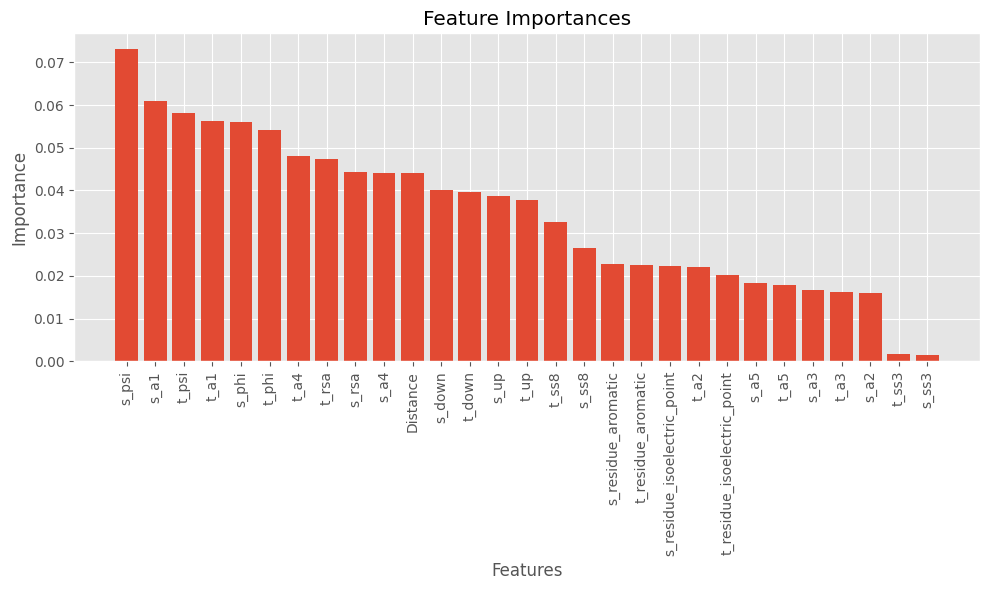

In [74]:
import matplotlib.pyplot as plt

# Print feature importances
print("Feature Importances:")
feature_names = ['s_ss8', 's_rsa', 's_up',
       's_down', 's_phi', 's_psi', 's_ss3', 's_a1', 's_a2', 's_a3', 's_a4',
       's_a5', 't_ss8', 't_rsa', 't_up',
       't_down', 't_phi', 't_psi', 't_ss3', 't_a1', 't_a2', 't_a3', 't_a4',
       't_a5', 'Distance', 's_residue_isoelectric_point',
       't_residue_isoelectric_point', 's_residue_aromatic',
       't_residue_aromatic']
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_names)), sorted_importances)
plt.xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()
